In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
data = pd.read_csv('ProcessoSeletivo.csv')
display(data)
display(data.describe(include='all'))

**Análise da Proporção de Gêneros no Processo Seletivo**

Primeiramente, separei os dados em duas categorias: participantes e aprovados. Criei gráficos de barras que ilustram o total de homens e mulheres tanto no total de participantes quanto entre os aprovados. Além disso, utilizei gráficos de setor para representar visualmente a proporção de cada gênero dentro desses dois grupos.

Os resultados revelaram que a proporção de homens e mulheres entre os participantes foi consistentemente refletida entre os aprovados. Em outras palavras, a proporção de homens e mulheres que participaram do processo seletivo foi aproximadamente a mesma na fase de aprovação. Este achado indica que a distribuição de gêneros foi mantida ao longo do processo, sugerindo que não houve viés de gênero na seleção final dos candidatos.

Essa análise proporciona uma visão clara e objetiva sobre a equidade de gênero no processo seletivo, evidenciando que a seleção dos candidatos aprovados foi representativa da composição inicial dos participantes. A uniformidade nas proporções entre os grupos de participantes e aprovados pode ser um indicativo positivo de que o processo seletivo foi conduzido de maneira justa e imparcial.

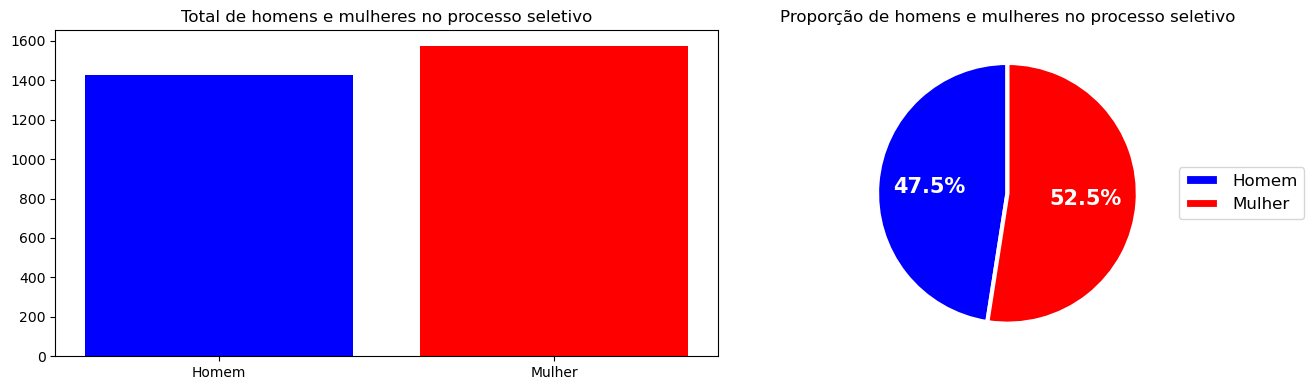

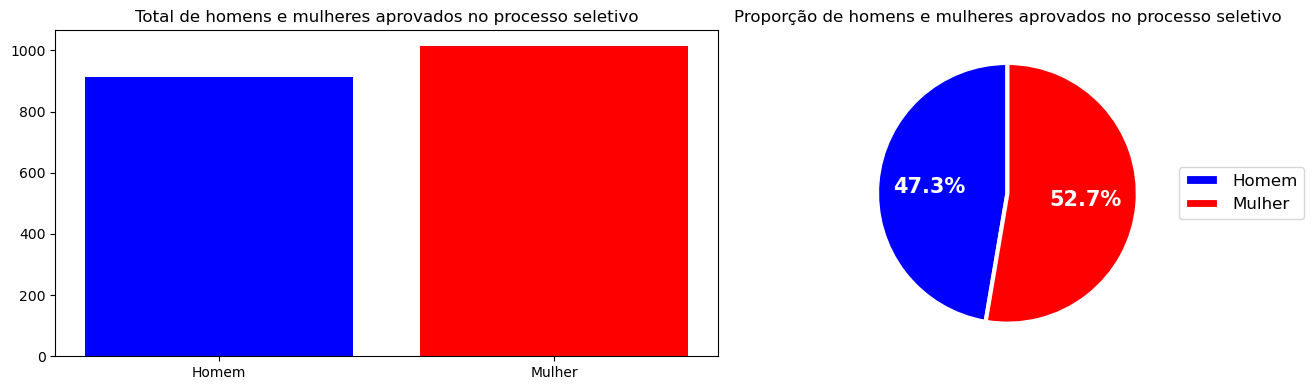

In [113]:
mulher_total = len(data.query("Sexo == 'F' "))
homem_total = len(data.query("Sexo == 'M' "))

x = ['Homem','Mulher']
y = [homem_total,mulher_total]

homem_aprovado = len(data.query("Sexo=='M' and Selecionado=='Sim'"))
mulher_aprovado = len(data.query("Sexo=='F' and Selecionado=='Sim'"))

k = [homem_aprovado,mulher_aprovado]

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].bar(x, y, color=['blue','red'])
ax[0].set_title('Total de homens e mulheres no processo seletivo')

wedges, texts, autotexts = ax[1].pie(y, labels=x, autopct='%1.1f%%', startangle=90,wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},colors=['blue','red'])
ax[1].legend(wedges, x, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1),fontsize='large')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(15)    # Tamanho da fonte
    autotext.set_fontweight('bold')
for text in texts:
    text.set_color('white')
ax[1].set_title('Proporção de homens e mulheres no processo seletivo')
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].bar(x, k, color=['blue','red'])
ax[0].set_title('Total de homens e mulheres aprovados no processo seletivo')

wedges, texts, autotexts = ax[1].pie(k, labels=x, autopct='%1.1f%%', startangle=90,wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},colors=['blue','red'])
ax[1].legend(wedges, x, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1),fontsize='large')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(15)    # Tamanho da fonte
    autotext.set_fontweight('bold')
for text in texts:
    text.set_color('white')
ax[1].set_title('Proporção de homens e mulheres aprovados no processo seletivo')
plt.tight_layout()
plt.show()



